# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import math

In [23]:
df = pd.read_csv('used_device_data.csv')

In [24]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [26]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [27]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

# Exploratory Data Analysis

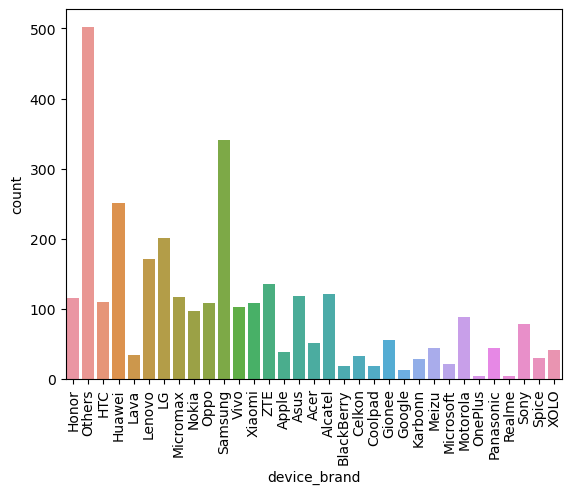

In [66]:
sns.set_palette('colorblind')
sns.countplot(x="device_brand", data=df)
plt.xticks(rotation = 'vertical')
plt.show()

Maximum user count is still Samsung's becuase of it's active marketing strategies and due to the wide range of segments available for all types of customers targeting both higher and lower segments of the society.

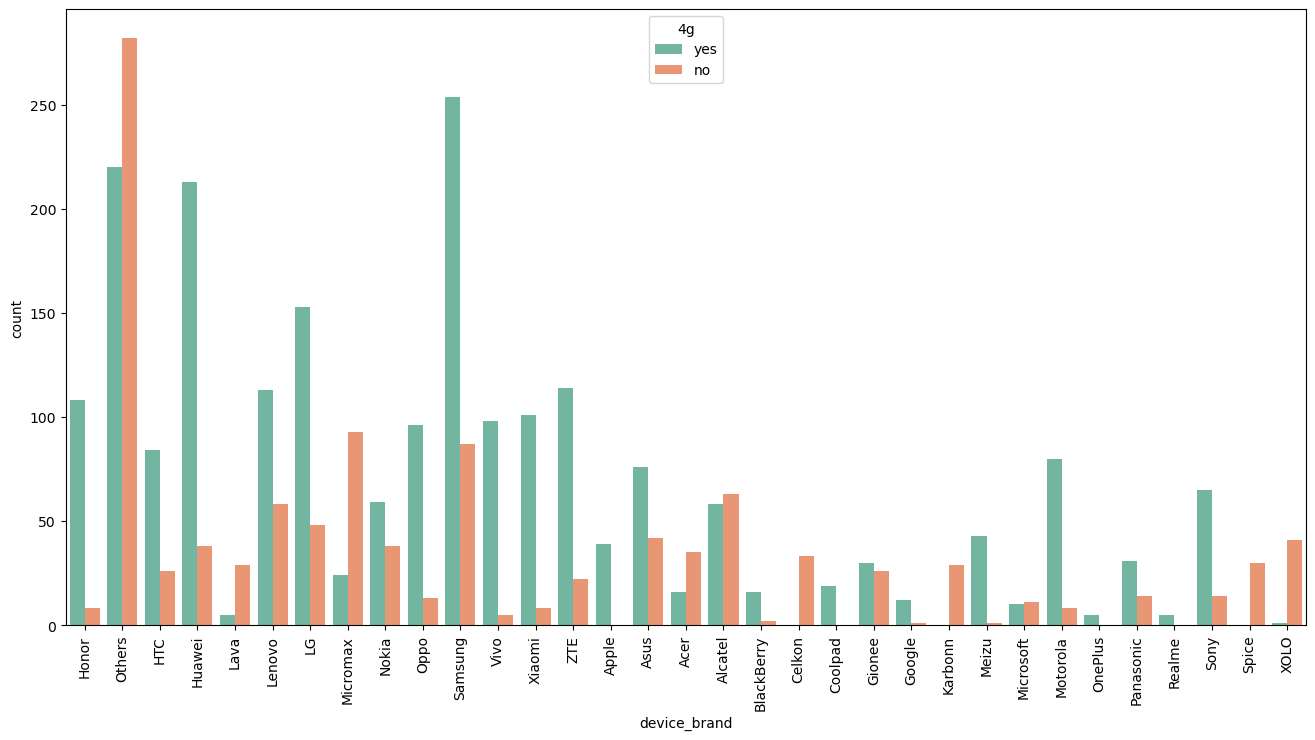

In [64]:
plt.figure(figsize = (16, 8))
sns.countplot(x="device_brand", hue = '4g', data=df)
plt.xticks(rotation = 'vertical')
plt.show()

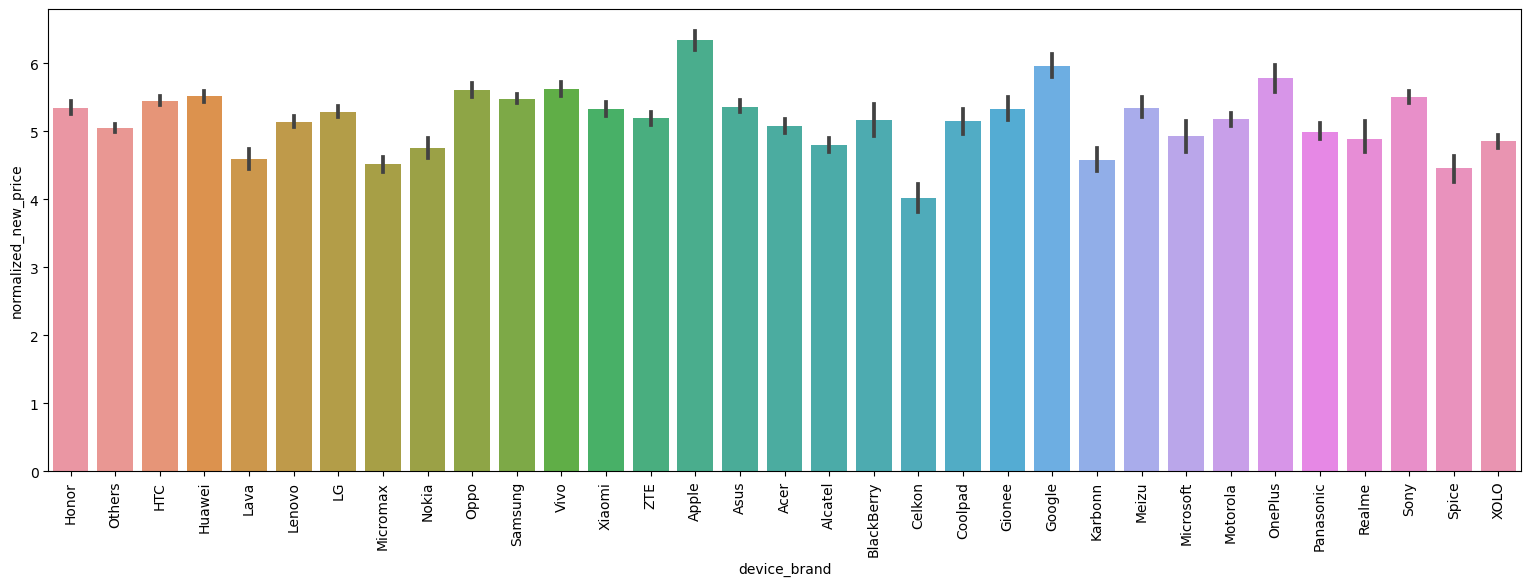

In [65]:
plt.figure(figsize=(19,6))
sns.barplot(x = df['device_brand'],y = df['normalized_new_price'])
plt.xticks(rotation = 'vertical')
plt.show()

It is clearly visible that Apple products cost the highest, followed by Google, One Plus, and so on. Brands such as Oppo, Vivo, Huawei and Sony are having nearly the same price which measn there is a cut throat competition amongst these brands and a custoemrs can take advantage of this into leaveraging themselves to get a better deal when buying a new product.

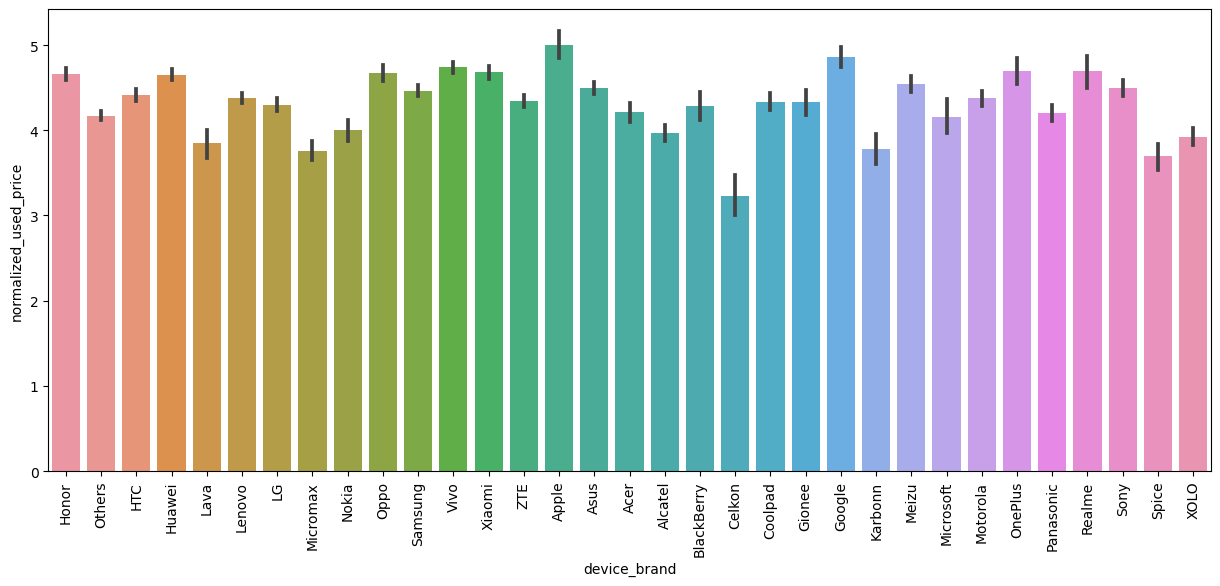

In [50]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['device_brand'],y = df['normalized_used_price'])
plt.xticks(rotation = 'vertical')
plt.show()

As per this, we ccan see that we get the best aftersale value for the devices in the following brands, listed in order of their decreasing prices: - 
1. Apple
2. Google
3. One Plus
4. Honor/Huawei
![](https://tenor.com/en-GB/view/money-well-spent-cipher-charlize-theron-f9-worth-it-gif-22837413)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_used', ylabel='Density'>

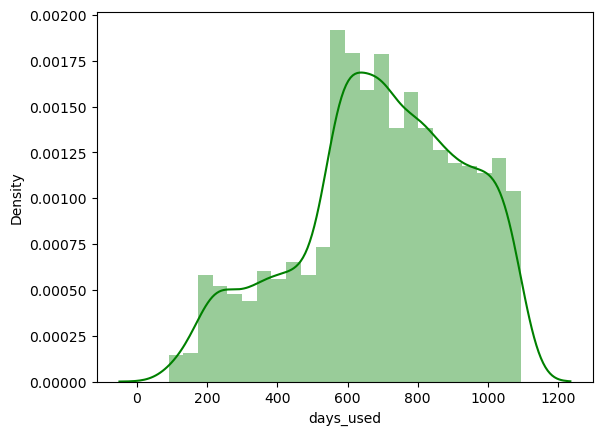

In [34]:
sns.distplot(df['days_used'],color='green')

As we see, majority phone are pretty old and the value for all of them will have a significant drop from their original prices, being nearly 2 years old. The one's which are over 3 years old can be used as burner phones or if the phone's are in a good shape, they can be used futher by selling out different components of the phone.

<AxesSubplot:>

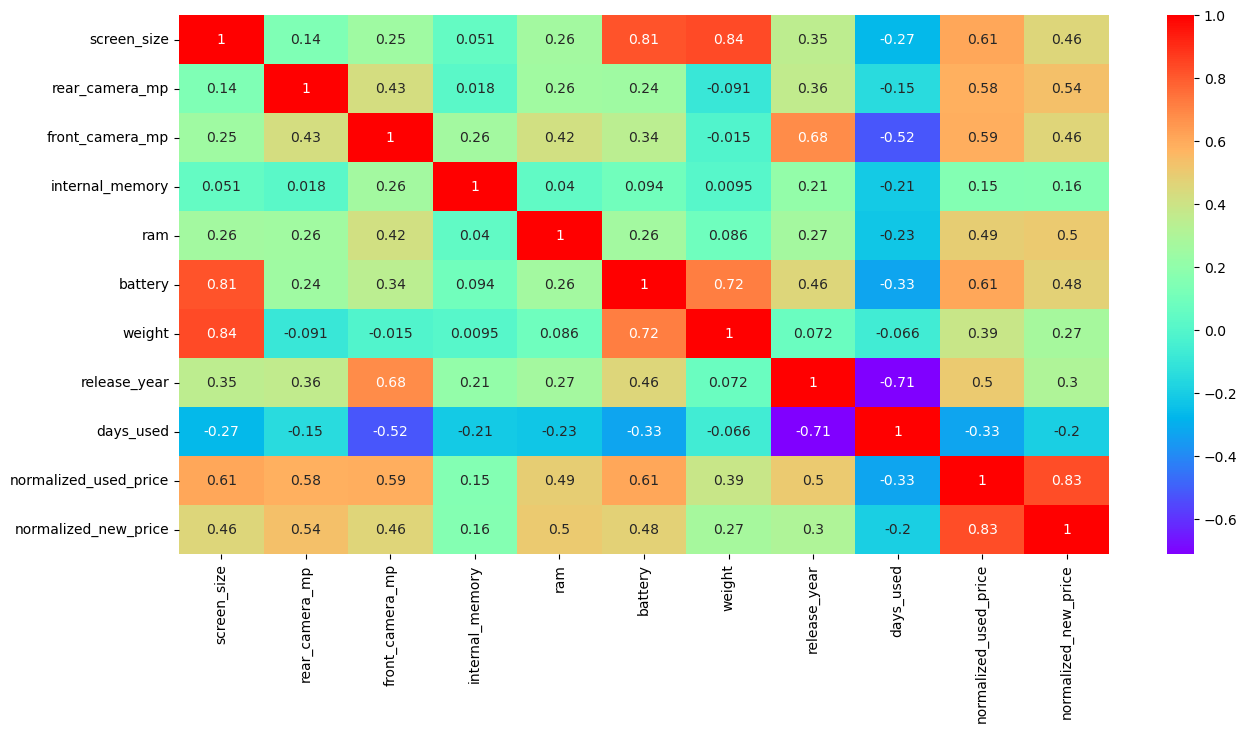

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

As we see, the usuage of a phone directly hampers all of the other variables upto some extent, a few of the features that are heavily affected are the battery life, camera quality(both front and back) and the processing speed.
We also see that screen size has a positive relation with the camera quality which means that to bring in bigger and better cameras in devices, the screen sizes are significantly increasing, that means the prices for bigger screens are more and now, as we can see in the market, majority new phones range between 6.4 to 6.8 inches or above. 

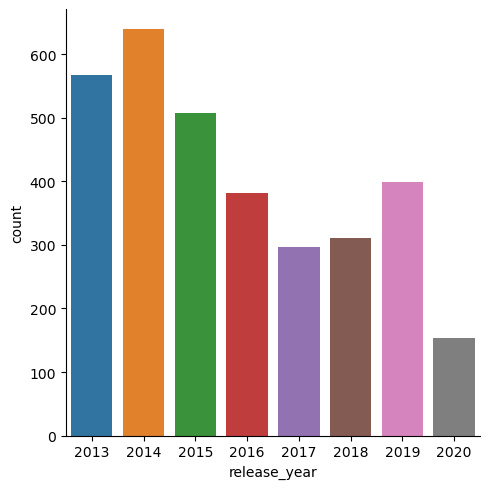

In [47]:
plot = sns.catplot(data=df, x='release_year', kind='count')

Majority devices are pretty old and hence, there is again a significant fall in the prices for the following brand, the graph shown above, we've already seen that how does the price of a product fall with the increase in the number of days the device is used and which brand's devices can offer us the highest value.

#Starting with the Models by Encoding the Data#

In [67]:
le = preprocessing.LabelEncoder()

In [68]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

In [70]:
print('Categorical columns:', categorical_cols)

Categorical columns: ['device_brand', 'os', '4g', '5g']


In [71]:
col_list = ['device_brand', 'os', '4g', '5g']

In [72]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

# Train test split

In [75]:
x = df.drop('normalized_used_price', axis = 1)
y = df['normalized_used_price']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.45)

In [77]:
clf = DecisionTreeRegressor(min_samples_split=250)

In [79]:
clf = clf.fit(x_train, y_train)

[Text(0.40789473684210525, 0.9285714285714286, 'X[13] <= 5.013\nsquared_error = 0.338\nsamples = 1789\nvalue = 4.334'),
 Text(0.10526315789473684, 0.7857142857142857, 'X[2] <= 10.2\nsquared_error = 0.257\nsamples = 651\nvalue = 3.842'),
 Text(0.05263157894736842, 0.6428571428571429, 'squared_error = 0.215\nsamples = 193\nvalue = 3.288'),
 Text(0.15789473684210525, 0.6428571428571429, 'X[9] <= 2112.5\nsquared_error = 0.091\nsamples = 458\nvalue = 4.075'),
 Text(0.10526315789473684, 0.5, 'squared_error = 0.054\nsamples = 158\nvalue = 3.859'),
 Text(0.21052631578947367, 0.5, 'X[13] <= 4.37\nsquared_error = 0.073\nsamples = 300\nvalue = 4.189'),
 Text(0.15789473684210525, 0.35714285714285715, 'squared_error = 0.152\nsamples = 15\nvalue = 3.633'),
 Text(0.2631578947368421, 0.35714285714285715, 'X[5] <= 9.25\nsquared_error = 0.051\nsamples = 285\nvalue = 4.219'),
 Text(0.21052631578947367, 0.21428571428571427, 'squared_error = 0.043\nsamples = 166\nvalue = 4.126'),
 Text(0.3157894736842105, 

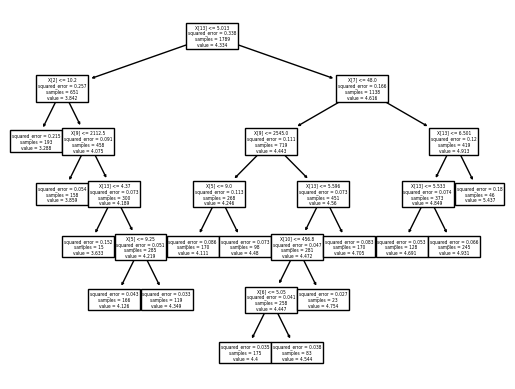

In [81]:
tree.plot_tree(clf)

Looking at the MSE, RMSE and RSquared values for the Training Dataset

In [83]:
y_pred_train_clf = clf.predict(x_train)
mean_squared_error(y_train,y_pred_train_clf)

0.07850375037478545

In [84]:
mse_train_clf = mean_squared_error(y_train,y_pred_train_clf)

In [85]:
import math
rmse_train_clf = math.sqrt(mse_train_clf)
print("RMSE:", rmse_train_clf)

RMSE: 0.280185207273306


In [86]:
r2_score(y_train,y_pred_train_clf)

0.7675492915458155

Now Looking at the MSE, RMSE and Rsquared values for the Testing Dataset

In [88]:
y_pred_test_clf = clf.predict(x_test)

In [89]:
mean_squared_error(y_test,y_pred_test_clf)

0.09680821618185893

In [90]:
mse_test_clf = mean_squared_error(y_test,y_pred_test_clf)

In [91]:
import math
rmse_test_clf = math.sqrt(mse_test_clf)
print("RMSE:", rmse_test_clf)

RMSE: 0.311140187346249


In [92]:
r2_score(y_test,y_pred_test_clf)

0.7091675338951746

# Multiple Linear Regression Begins (Training Data)

In [94]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [95]:
y_pred_train_lr = lr.predict(x_train)

In [96]:
y_pred_test_lr = lr.predict(x_test)

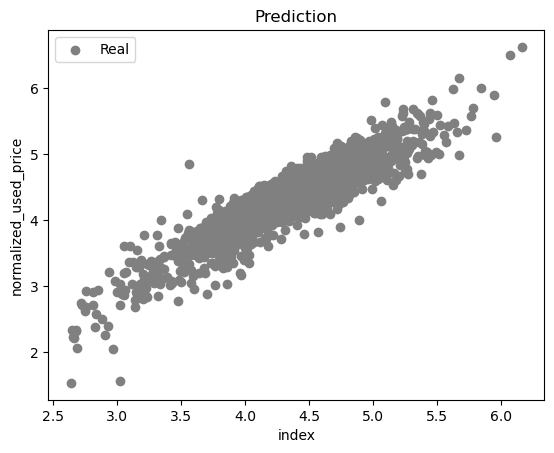

In [100]:
plt.xlabel('index')
plt.ylabel('normalized_used_price')
plt.title('Prediction')
plt.scatter(y_pred_train_lr,y_train, color = 'grey')
plt.legend(["Real", "Predicted"])

# Multiple Linear Regression Begins (Testing Data)

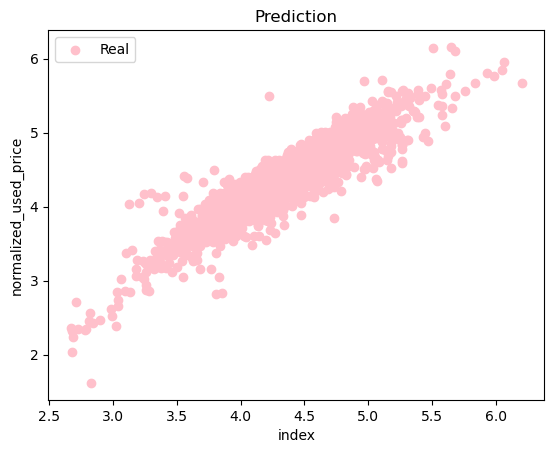

In [106]:
plt.xlabel('index')
plt.ylabel('normalized_used_price')
plt.title('Prediction')

plt.scatter(y_pred_test_lr,y_test, color = 'pink')

plt.legend(["Real", "Predicted"])

# Multiple Linear Regression for Training Data

In [109]:
#MSE Value for the training Data
mean_squared_error(y_train,y_pred_train_lr)

0.05392569711588913

In [110]:
mse_train_lr=mean_squared_error(y_train,y_pred_train_lr)

In [111]:
#Checking the RMSE value
import math
rmse_train_lr = math.sqrt(mse_train_lr)
print("RMSE:", rmse_train_lr)

RMSE: 0.2322190713871045


In [112]:
#Rsquared value for the training Data
r2_score(y_train,y_pred_train_lr)

0.8403252527601494

# Multiple Linear Regression for Testing Data

In [115]:
#MSE value for the testing Data
mean_squared_error(y_test,y_pred_test_lr)

0.05607939135704763

In [116]:
mse_test_lr=mean_squared_error(y_test,y_pred_test_lr)

In [117]:
# Checking the test RSME
import math
rmse_test_lr = math.sqrt(mse_test_lr)
print("RMSE:", rmse_test_lr)

RMSE: 0.23681087677099552


In [118]:
#Checking the Rsquared Value
r2_score(y_test,y_pred_test_lr)

0.8315255839918668

In [119]:
def make_prediction(input_string):
    le = preprocessing.LabelEncoder()
    encoded_input = le.transform([input_string])
    prediction = lr.predict(input_string)
    return prediction